### **Customer Sentiment Analysis**

#### Importing the necessary libraries

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [95]:
file_path='C:/Users/Raj Bhardwaj/OneDrive/Desktop/Sample Set LLC/BA - Assignment Part 2 data set.csv'
df=pd.read_csv(file_path)

In [96]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


**Checking Null Values**

In [97]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [98]:
df.drop(['Unnamed: 0', 'Title'], axis=1, inplace=True)
df.dropna(inplace=True)

In [99]:
df.isnull().sum()

Clothing ID                0
Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

**Data Preprocessing**

In [100]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText

df['Review Text'] = preprocess(df['Review Text'])

**Calculating sentiment polarity using TextBlob where 1 means positive sentiment and -1 means negative sentiment**

In [101]:
pip install textblob


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [102]:
from textblob import TextBlob
df['Polarity'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

Word Counts and Review Length

In [103]:
df['word_count'] = df['Review Text'].apply(lambda x: len(str(x).split()))
df['review_len'] = df['Review Text'].apply(lambda x: len(str(x)))

**Checking positive, neutral and negative polarity reviews**

**Polarity=1**

In [104]:
cl = df.loc[df.Polarity == 1, ['Review Text']].sample(5).values
for c in cl:
    print(c[0])

Great dress for vacations!
Perfect for lunch with the girls, pta, or saturdays with the family. this skirt is a perfect addition to your fall wardrobe.
This is awesome multi-season dress.
The material is great!! got them in both colors and went with a tall size for one. everyone compliments them!
Loved this dress and was even happier to learn i could order it in petite!!


**Polarity=0**

In [105]:
cl = df.loc[df.Polarity == 0, ['Review Text']].sample(5).values
for c in cl:
    print(c[0])

Just received pants and even though they are labeled "petite" they are not. the inseam is 28 for a waist size 26, which is not what the description states.
The fabric is too sheer, also looks like sleepwear. just not my thing.
In the photos i have a different tank underneath than the one that comes with the shirt. i am wearing a medium and for reference my measurements are 38-30-40.
I like the skirt. that said it is going to the tailor to have some of the fullness taken out. just a lot of material going on, and heavier than you might have imagined. i will wear it fall & winter with white & navy cardigans.
Ooo la la! sooo chic! sooo retailer!!


**Polarity <= -0.5**

In [106]:
cl = df.loc[df.Polarity <= -0.5, ['Review Text']].sample(5).values
for c in cl:
    print(c[0])

I was really disappointed when this arrived and i discovered that it's basically see-through.  it's well constructed, it's just a really thin material.
This dress just fits weird. maybe it works for somebody..... there is a reason it has been put on sale...
40% sweaters...i couldn't pass it up. unfortunately, when i raise my arms, my tummy shows (i'm 5'6"), so i had to return it.
I would have bought this had it not been for the way the pockets are sewn in. they are attached on the inside by a string. if the string broke the pockets would dangle. for the price you would think they would have sewn pockets in to the vest. too bad.
Cut out design, no seems or hems.
 very disappointed in retailer


**Distribution for Review sentiment polarity score**

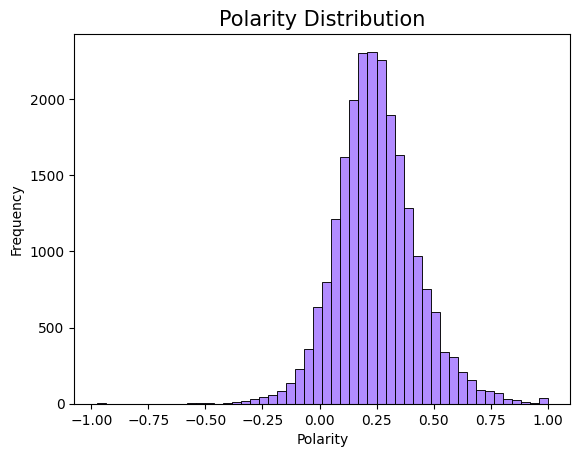

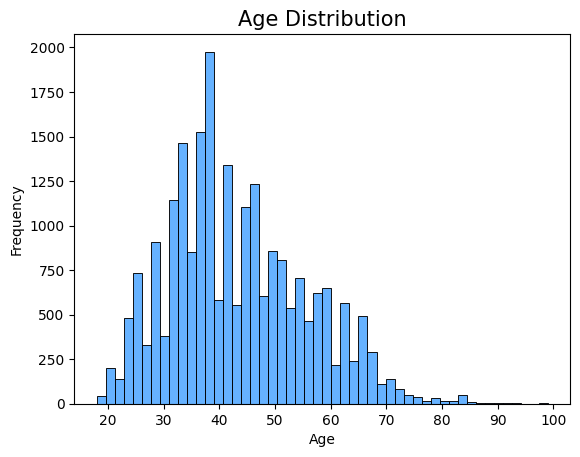

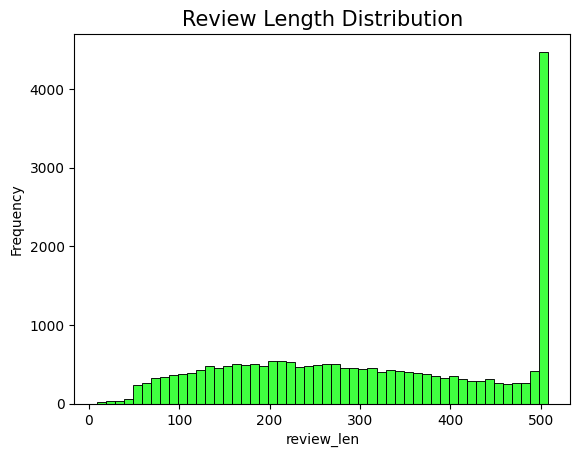

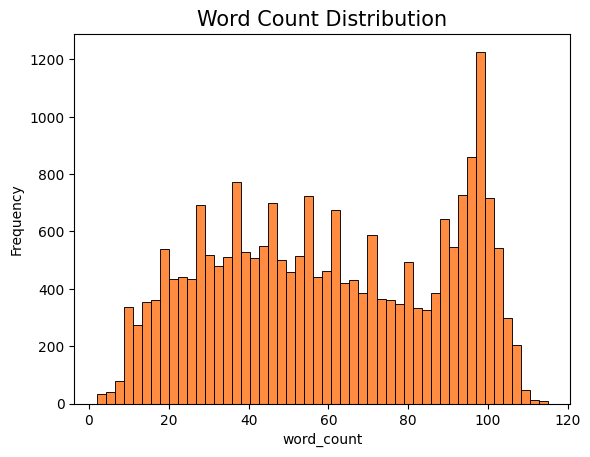

In [107]:
features = ['Polarity', 'Age', 'review_len', 'word_count']
titles = ['Polarity Distribution', 'Age Distribution', 'Review Length Distribution', 'Word Count Distribution']

for i, feature in enumerate(features):
    if i == 0:
        color = '#9966ff'  # Polarity - purple
    elif i == 1:
        color = '#3399ff'  # Age - blue
    elif i == 2:
        color = '#00ff00'  # Review length - green
    elif i == 3:
        color = '#ff6600'  # Word count - orange
    
    sns.histplot(data=df, x=feature, bins=50, color=color)
    plt.title(titles[i], size=15)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


<li> Most of the sentiment polarity scores are greater than 0 so we can say that most of the reviews are positive. </li>
<li> The age of most of the reviewers are in the range of 30 to 40. </li>

**Visualization for review ratings**

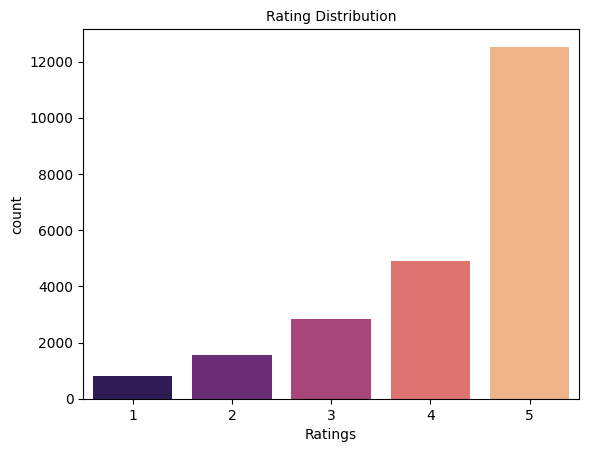

In [108]:
sns.countplot(x = 'Rating', palette='magma', data=df)
plt.title('Rating Distribution', size=10)
plt.xlabel('Ratings')
plt.show()

From the above graph we can infer that the ratings are aligning with the polarity score (maximum ratings are in 4 and 5)

**Visualization for Division Name**

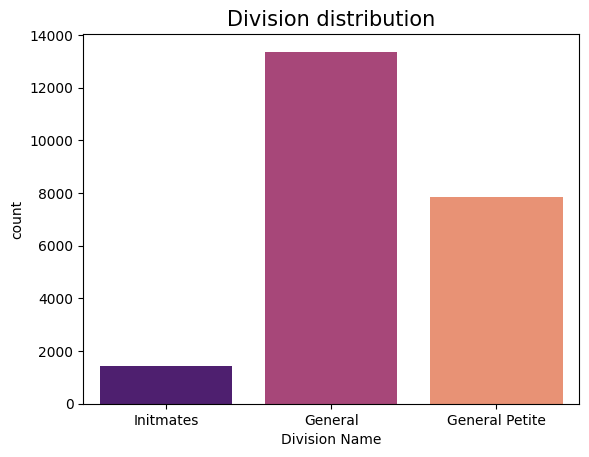

In [109]:
sns.countplot(x='Division Name', palette='magma', data=df)
plt.title('Division distribution', size=15)
plt.show()

General division is having maximum number of reviews.

**Department**

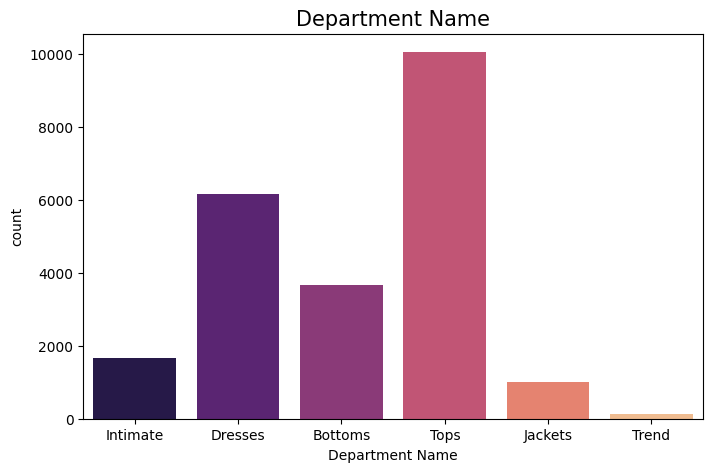

In [110]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Department Name', palette='magma', data=df)
plt.title('Department Name', size=15)
plt.show()

**Distribution of class**

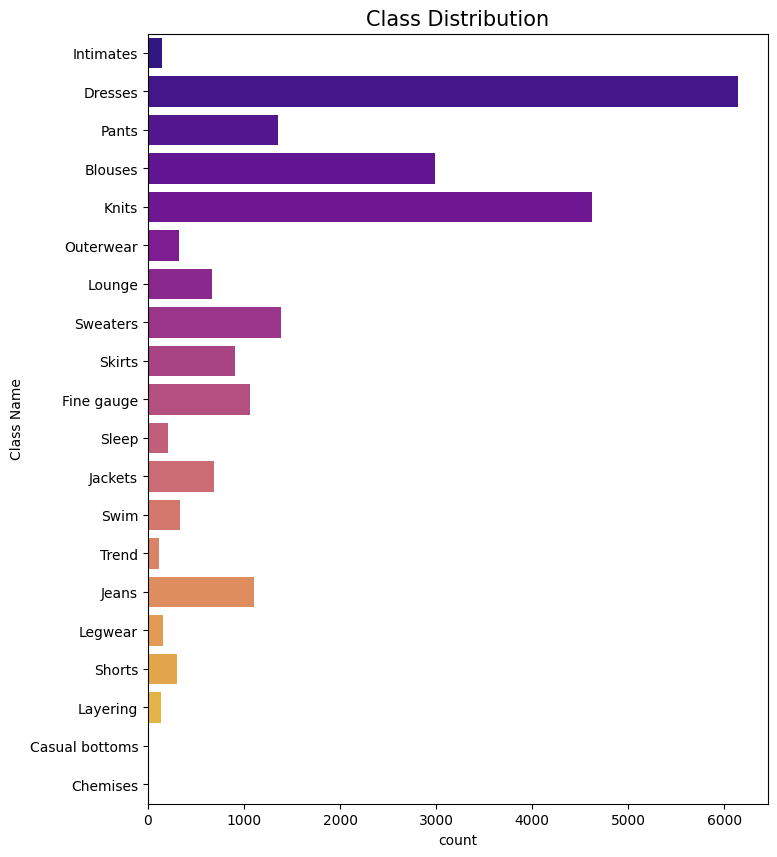

In [111]:
plt.figure(figsize=(8, 10))
sns.countplot(y='Class Name', palette='plasma', data=df)
plt.title('Class Distribution', size=15)
plt.show()

**Unigrams, Bigrams, Trigrams**

Extracting N-Gram Features; these are used to describe no. of words used as observation points. Unigram for 1 worded, bigram for 2 and so on.

In [112]:
def get_top_ngrams(corpus, ngram_range, stop_words=None, n=None):
    vec = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    common_words = words_freq[:n]
    words = []
    freqs = []
    for word, freq in common_words:
        words.append(word)
        freqs.append(freq)
        
    df = pd.DataFrame({'Word': words, 'Freq': freqs})
    return df

In [113]:
from sklearn.feature_extraction.text import CountVectorizer

In [114]:
stop_words = None
n = 15
unigrams = get_top_ngrams(df['Review Text'], (1, 1), stop_words, n)
bigrams = get_top_ngrams(df['Review Text'], (2, 2), stop_words, n)
trigrams = get_top_ngrams(df['Review Text'], (3, 3), stop_words, n)

In [115]:
stop_words = 'english'
n = 15
unigrams_st = get_top_ngrams(df['Review Text'], (1, 1), stop_words, n)
bigrams_st = get_top_ngrams(df['Review Text'], (2, 2), stop_words, n)
trigrams_st = get_top_ngrams(df['Review Text'], (3, 3), stop_words, n)

**Unigrams Distribution**

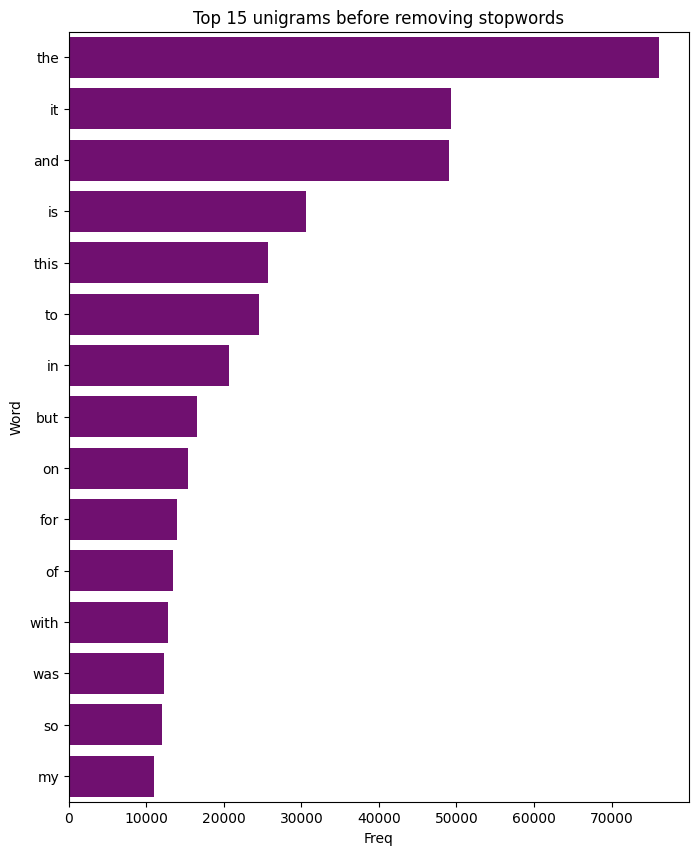

In [116]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color='purple', data=unigrams)
plt.title('Top 15 unigrams before removing stopwords', size=12)
plt.show()

**After removing Stopwords**

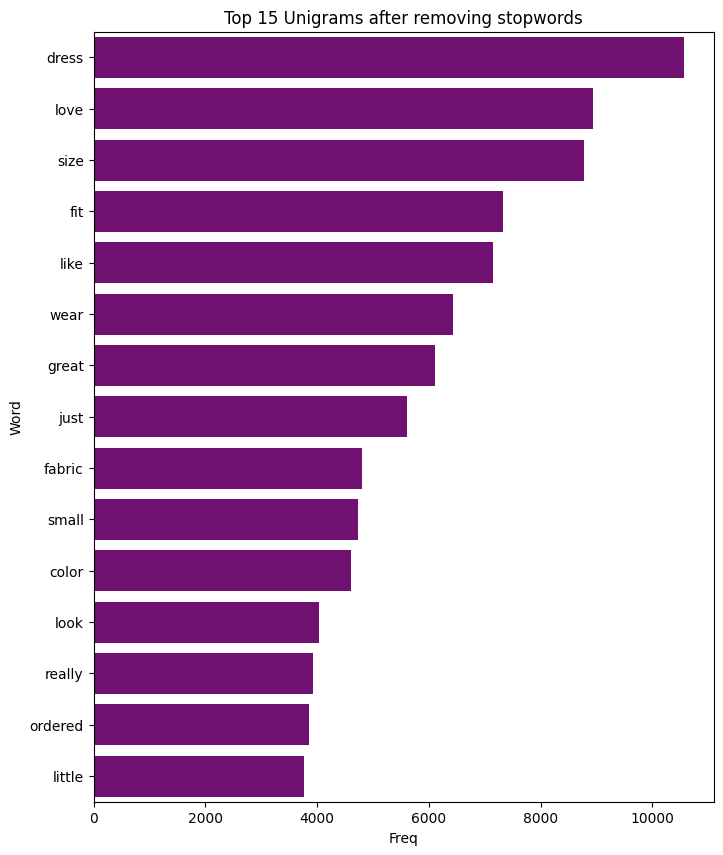

In [117]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color='purple', data=unigrams_st)
plt.title('Top 15 Unigrams after removing stopwords', size=12)
plt.show()

**Bigram Distribution**

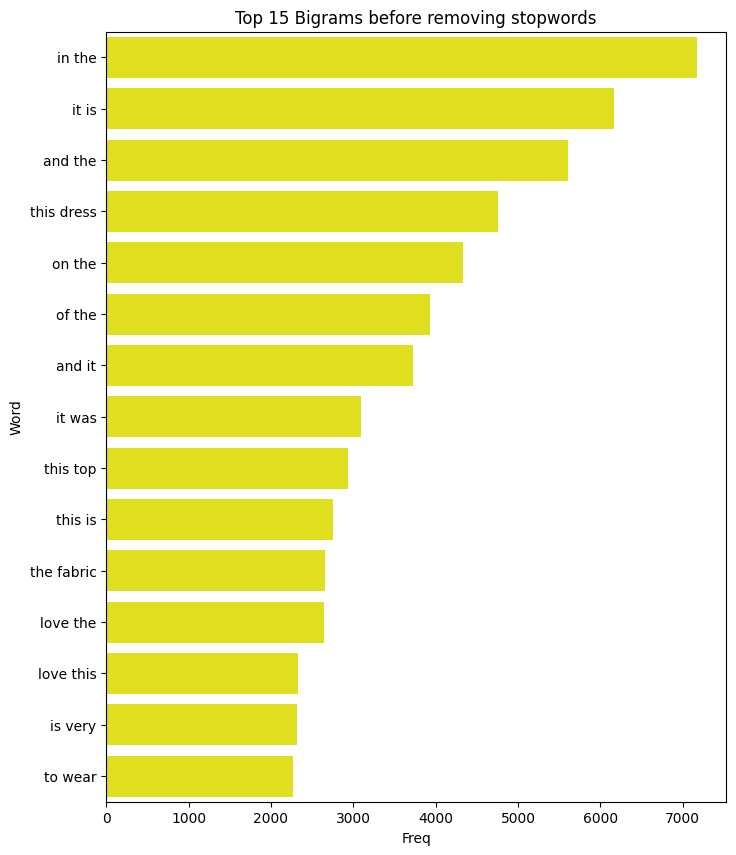

In [118]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color='yellow', data=bigrams)
plt.title('Top 15 Bigrams before removing stopwords', size=12)
plt.show()

**After removing Stopwords**

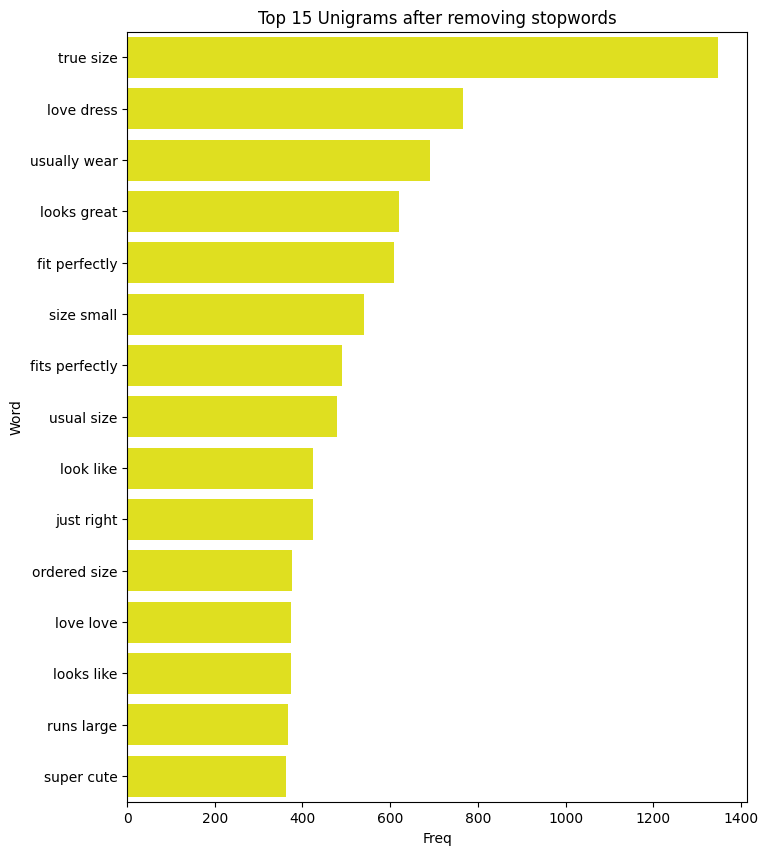

In [119]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color='yellow', data=bigrams_st)
plt.title('Top 15 Unigrams after removing stopwords', size=12)
plt.show()

**Trigram Distribution**

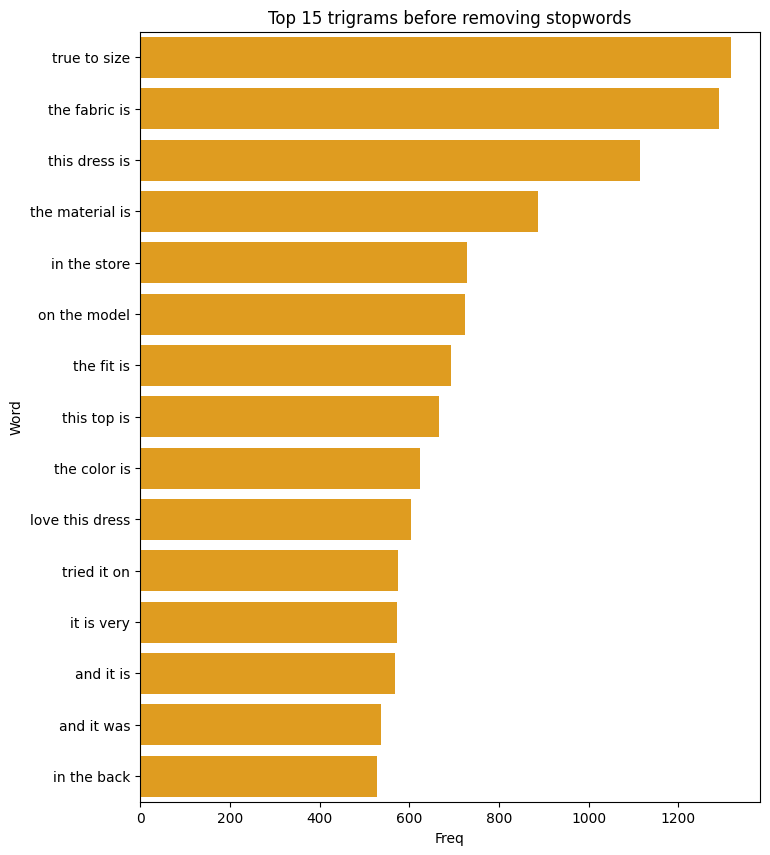

In [120]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color='orange', data=trigrams)
plt.title('Top 15 trigrams before removing stopwords', size=12)
plt.show()

**After removing Stopwords**

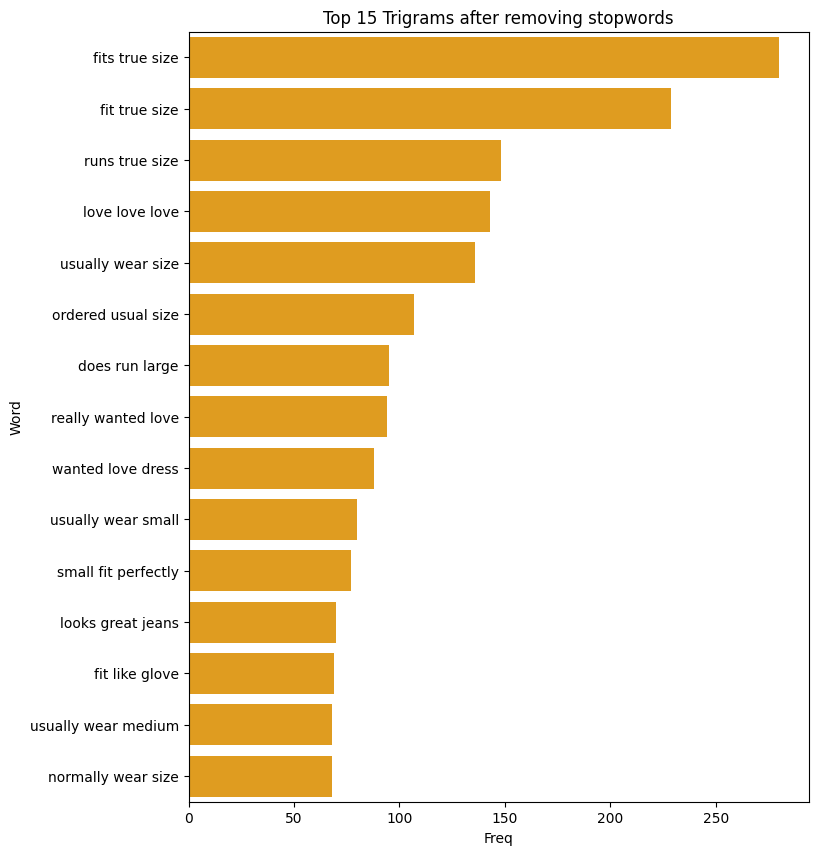

In [121]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color='orange', data=trigrams_st)
plt.title('Top 15 Trigrams after removing stopwords', size=12)
plt.show()

**POS Tagging**

In [122]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Raj
[nltk_data]     Bhardwaj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [123]:
blob = TextBlob(str(df['Review Text']))
pos_df = pd.DataFrame(blob.tags, columns=['word', 'pos'])
#top_pos = pd.DataFrame(pos_df['pos'].value_counts(), columns=['pos', 'count'])
top_pos = pos_df['pos'].value_counts()

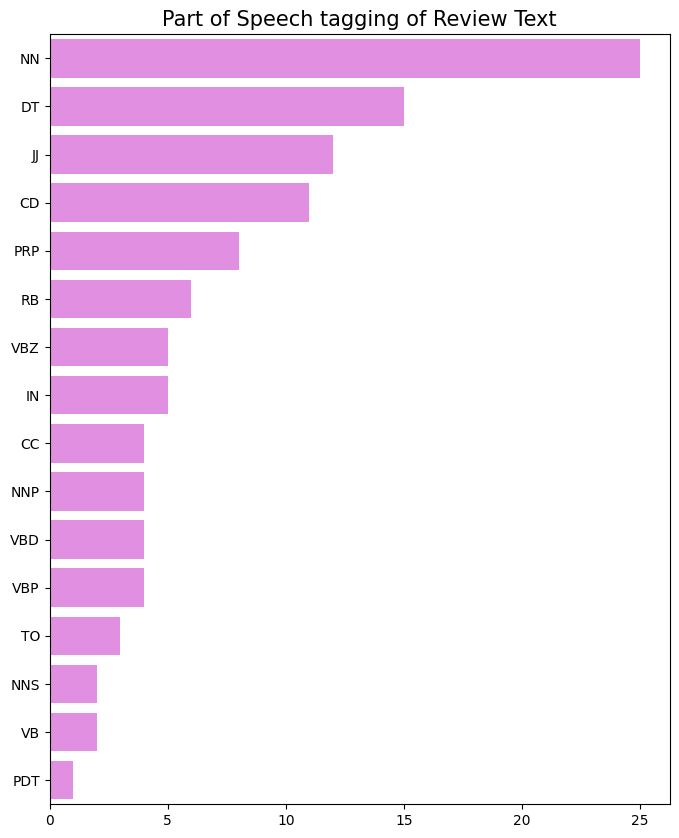

In [124]:
plt.figure(figsize=(8, 10))
sns.barplot(y=top_pos.index, x=top_pos.values, color='violet')
plt.title('Part of Speech tagging of Review Text', size=15)
plt.show()

**Departmnt name v/s Sentiment Polarity**

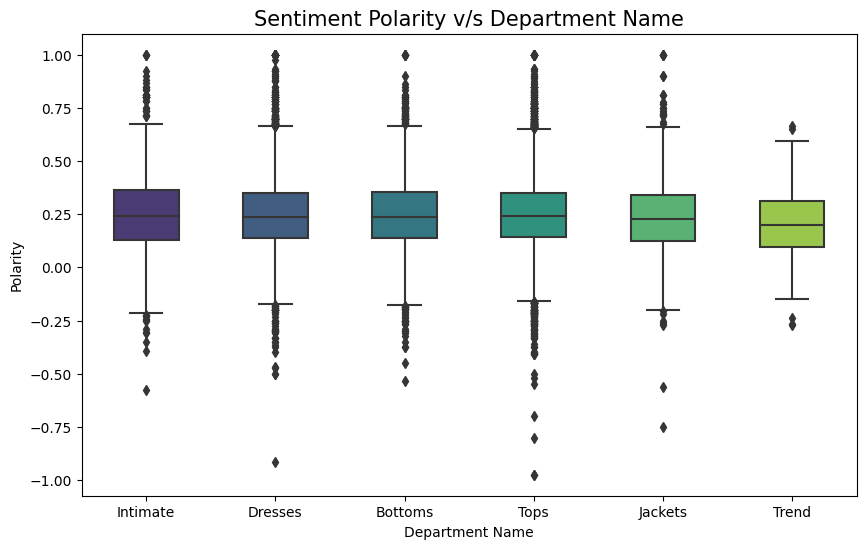

In [125]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department Name', y='Polarity', width=0.5, palette='viridis', data=df)
plt.title('Sentiment Polarity v/s Department Name', size=15)
plt.show()

In [126]:
#df.drop(['Clothing ID], axis = 1, inplace= True)

In [127]:
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,word_count,review_len
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,8,53
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,62,303
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,98,500
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,22,124
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,36,192


In [128]:
df.shape

(22628, 12)

In [129]:
df = df.rename(columns = {'Review Text' : 'text','Positive Feedback Count' : 'feedback_count',
 'Division Name' : 'division', 'Department Name' : 'department', 'Class Name' :'class'})

In [130]:
df.rename(columns={'Recommended IND': 'recommended'}, inplace=True)

In [131]:
df.head(1)

,Clothing ID,Age,text,Rating,recommended,feedback_count,division,department,class,Polarity,word_count,review_len
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,8,53


In [132]:
df.describe(include=object).T

,count,unique,top,freq
text,22628,22621,Perfect fit and i've gotten so many compliment...,3
division,22628,3,General,13365
department,22628,6,Tops,10048
class,22628,20,Dresses,6145


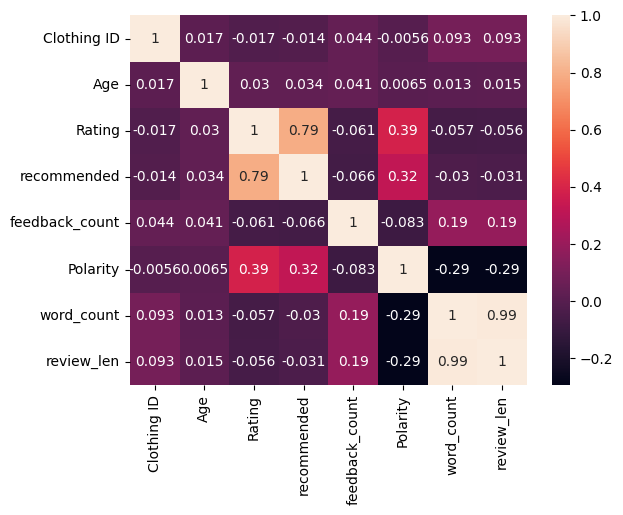

In [133]:
sns.heatmap(df.corr(), annot=True);

In [134]:
df.columns

Index(['Clothing ID', 'Age', 'text', 'Rating', 'recommended', 'feedback_count',
       'division', 'department', 'class', 'Polarity', 'word_count',
       'review_len'],
      dtype='object')

In [135]:
def first_look(col):
    print("column name    : ", col)
    print("********************")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [136]:
first_look("Age")

column name    :  Age
********************
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  77
39    1225
35     851
36     799
34     765
38     751
      ... 
93       2
90       2
86       2
99       2
92       1
Name: Age, Length: 77, dtype: int64


In [137]:
df.Age.describe().T

count    22628.000000
mean        43.282880
std         12.328176
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

In [138]:
import plotly.express as px

In [139]:
px.histogram(df, x = df.Age)

In [140]:
df.columns

Index(['Clothing ID', 'Age', 'text', 'Rating', 'recommended', 'feedback_count',
       'division', 'department', 'class', 'Polarity', 'word_count',
       'review_len'],
      dtype='object')

1    18527
0     4101
Name: recommended, dtype: int64


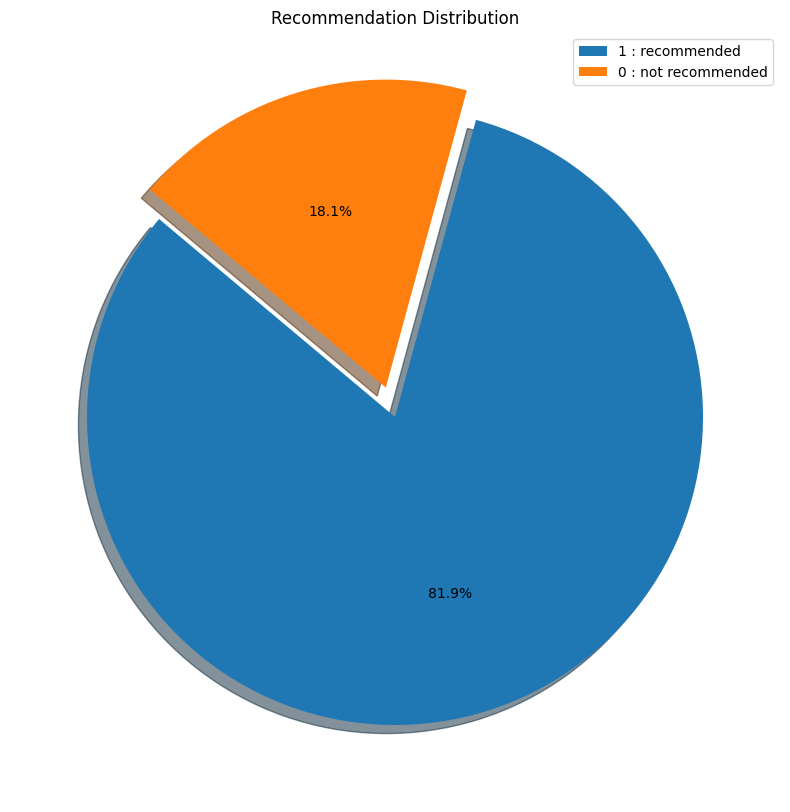

In [141]:
# 1 is recommended, 0 is not recommended.

print(df.recommended.value_counts())

plt.figure(figsize=(10,10))

explode = [0,0.1]
plt.pie(df.recommended.value_counts(), explode=explode,autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['1 : recommended','0 : not recommended'])
plt.title('Recommendation Distribution')
plt.axis('off');

##### Feature Selection & Data Cleaning

In [142]:
df_new=df.copy()

In [143]:
df_new.columns

Index(['Clothing ID', 'Age', 'text', 'Rating', 'recommended', 'feedback_count',
       'division', 'department', 'class', 'Polarity', 'word_count',
       'review_len'],
      dtype='object')

In [144]:
df_new.drop(['Age','Rating','Polarity','word_count','review_len', 'feedback_count','division','department','class'], axis=1, inplace=True)

In [145]:
df_new.head(1)

,Clothing ID,text,recommended
0,767,Absolutely wonderful - silky and sexy and comf...,1


In [146]:
df_new = df[['text', 'recommended']]

In [147]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         22628 non-null  object
 1   recommended  22628 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.3+ KB


In [148]:
# df_new.rename(columns = {'review_text':'text', 'recommended':'recommend'}, inplace = True)

In [149]:
df_new.columns

Index(['text', 'recommended'], dtype='object')

In [150]:
df_new.isnull().sum()

text           0
recommended    0
dtype: int64

In [151]:
df_new["text"].str.isspace().sum()
df_new[df_new["text"].str.isspace() == True].index

Int64Index([], dtype='int64')

#### Text Mining

<li> Tokenization : Tokenization in NLP is the process of breaking down a text into smaller units, typically words or subwords, to facilitate further analysis or processing. </li>
<li> Stemming or Lemmatization : Reducing words to their base or root forms to normalize variations. </li?>
<li> Vectorization: Converting text features into numerical vectors, such as Bag-of-Words or TF-IDF vectors. </li>

In [152]:
df_new.head()

,text,recommended
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [153]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Raj
[nltk_data]     Bhardwaj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [154]:
stop_words = stopwords.words('english')

In [155]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [156]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower()) 
        
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]  
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
        
    #joining
    return " ".join(text_cleaned)

In [157]:
df_new["text"] = df_new["text"].apply(cleaning)
df_new["text"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: text, dtype: object

#### Rare Words

In [158]:
" ".join(df_new["text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 's

In [159]:
rare_words = pd.Series(" ".join(df_new["text"]).split()).value_counts()
rare_words

dress       11352
fit         10125
size         9361
love         8986
top          8281
            ...  
harness         1
anyday          1
hero            1
unsung          1
platinum        1
Length: 11995, dtype: int64

In [160]:
rare_words = rare_words[rare_words <= 2] 

In [161]:
rare_words.index

Index(['popcorn', 'curly', 'retur', 'formality', 'lopsided', 'spencer', 'anns',
       'thee', 'tennies', 'comfotable',
       ...
       'admirable', 'slid', 'bizarrely', 'limitation', 'lusciousness',
       'harness', 'anyday', 'hero', 'unsung', 'platinum'],
      dtype='object', length=6498)

In [162]:
df_new["text"] = df_new["text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df_new["text"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: text, dtype: object

#### Creating word cloud
Representing the words that are occuring most no. of times

In [163]:
df_new[df_new["recommended"] == 0].head()

,text,recommended
2,high hope dress really wanted work initially o...,0
5,love tracy reese dress one petite foot tall us...,0
10,dress run small esp zipper area run ordered sp...,0
22,first pullover styling side zipper wouldnt pur...,0
25,loved material didnt really look long dress pu...,0


In [164]:
df_new[df_new["recommended"] == 1].head(3)

,text,recommended
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im ...,1
3,love love love jumpsuit fun flirty fabulous ev...,1


In [165]:
" ".join(df_new["text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flatteri

In [166]:
positive_words =" ".join(df_new[df_new["recommended"] == 1].text).split()
positive_words

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'basket',
 'hte',
 'last',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turn',
 'trying',
 'little',
 'baggy',
 'hte',
 'x',
 'hte',
 'size',
 'bummer',
 'petite',
 'decided',
 'though',
 'said',
 'everything',
 '

In [167]:
negative_words = " ".join(df_new[df_new["recommended"] == 0].text).split()
negative_words 

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 'small',
 'frame',
 'stranger',
 'alteration',
 'shortening',
 'skirt',
 'would',
 'take',
 'away',
 'embellishment',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'work',
 'returned',
 'dress',
 'dress',
 'run',
 'small',
 'esp',
 'zipper',
 'area',
 'run',
 'ordered',
 'sp',
 'typically',
 'fit',
 'tight',
 'material',

##### Count of positive and negative words

In [168]:
len(positive_words)

516563

In [169]:
len(negative_words)

116479

In [170]:
review_text = df_new["text"]

In [171]:
all_words = " ".join(review_text)

In [172]:
all_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

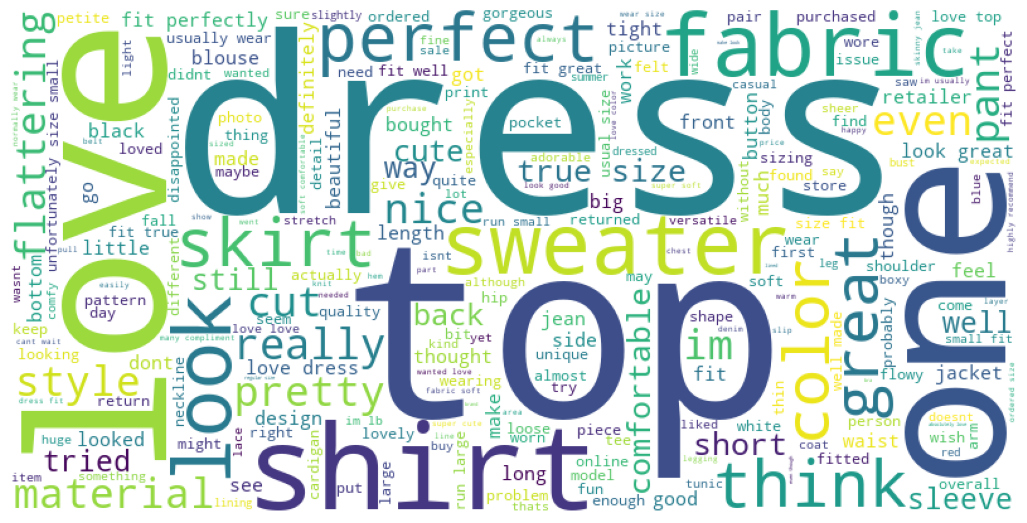

In [173]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 250).generate(all_words)

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

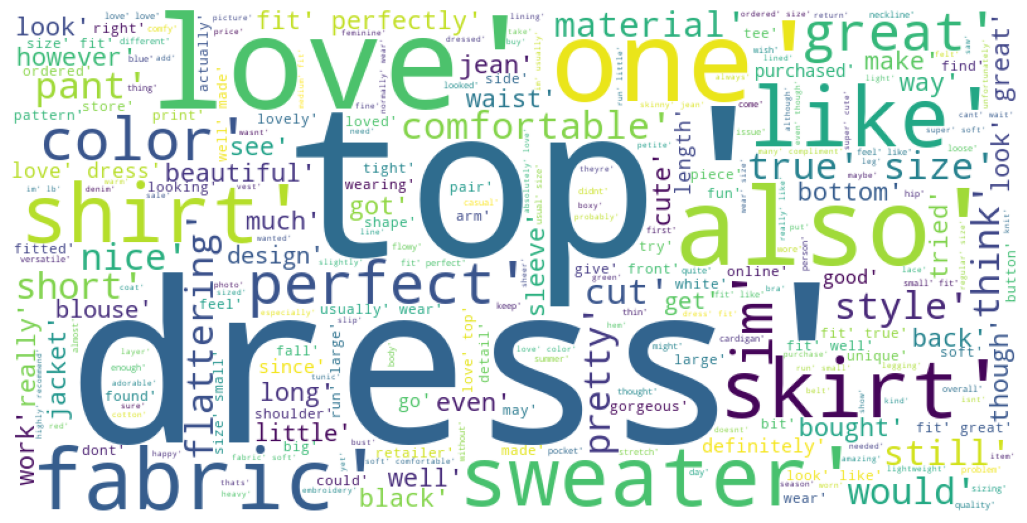

In [174]:
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 250).generate(str(positive_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

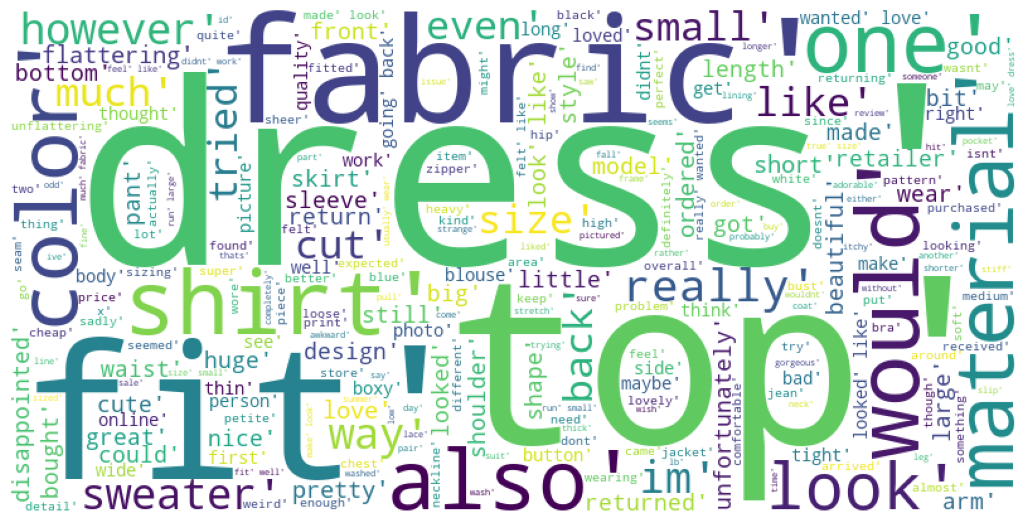

In [175]:
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 250).generate(str(negative_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##### Count of each words

In [176]:
from collections import Counter

In [177]:
counter_all = Counter(word_tokenize(all_words))
counter_all.most_common(40)

[('dress', 11352),
 ('fit', 10125),
 ('size', 9361),
 ('love', 8986),
 ('top', 8281),
 ('like', 7035),
 ('color', 6915),
 ('look', 6890),
 ('wear', 6516),
 ('great', 6098),
 ('im', 5967),
 ('would', 5013),
 ('fabric', 4861),
 ('small', 4586),
 ('really', 3923),
 ('ordered', 3835),
 ('little', 3771),
 ('perfect', 3758),
 ('one', 3704),
 ('flattering', 3485),
 ('soft', 3315),
 ('well', 3248),
 ('back', 3185),
 ('comfortable', 3045),
 ('cute', 3030),
 ('nice', 3016),
 ('bought', 2986),
 ('beautiful', 2950),
 ('bit', 2877),
 ('material', 2811),
 ('shirt', 2790),
 ('large', 2790),
 ('much', 2703),
 ('sweater', 2700),
 ('length', 2638),
 ('run', 2631),
 ('jean', 2599),
 ('also', 2582),
 ('work', 2527),
 ('petite', 2430)]

### Sentiment Classification

**Splitting the data in training and testing**

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#### **Applying the models**

In [180]:
df_new.head()

,text,recommended
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im ...,1
2,high hope dress really wanted work initially o...,0
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1


##### Logistic Regression

In [204]:
from sklearn.linear_model import LogisticRegression
# Separate text and labels
X = df_new['text']
y = df_new['recommended']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text of the dataframe
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train of logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train_vec, y_train)

# Predict on the testing set
y_pred = log_model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8824569155987627

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.59      0.65       845
           1       0.91      0.95      0.93      3681

    accuracy                           0.88      4526
   macro avg       0.82      0.77      0.79      4526
weighted avg       0.88      0.88      0.88      4526



##### Random Forest Classifier

In [182]:
# Split df_new into features (X) and target variable (y)
X = df_new['text']
y = df_new['recommended']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Extract features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Predict on testing data
y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8561643835616438
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.27      0.41       845
           1       0.85      0.99      0.92      3681

    accuracy                           0.86      4526
   macro avg       0.87      0.63      0.66      4526
weighted avg       0.86      0.86      0.82      4526



#### Support Vector Machine

In [183]:
from sklearn.svm import SVC

# Separate text and labels
X = df_new['text']
y = df_new['recommended']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_vec, y_train)

# Predict on the testing set
y_pred = svm_model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8877596111356606

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.58      0.66       845
           1       0.91      0.96      0.93      3681

    accuracy                           0.89      4526
   macro avg       0.84      0.77      0.80      4526
weighted avg       0.88      0.89      0.88      4526



#### Naive Bayes Classifier

In [196]:
from sklearn.naive_bayes import MultinomialNB

# Separate text and labels
X = df_new['text']
y = df_new['recommended']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

# Predict on the testing set
y_pred = nb_classifier.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8844454264250994

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.76      0.71       845
           1       0.94      0.91      0.93      3681

    accuracy                           0.88      4526
   macro avg       0.81      0.84      0.82      4526
weighted avg       0.89      0.88      0.89      4526



Training and evaluating Logistic Regression...
Accuracy: 0.8825
--------------------------------------------------
Training and evaluating Naive Bayes...
Accuracy: 0.8844
--------------------------------------------------
Training and evaluating Random Forest...
Accuracy: 0.8555
--------------------------------------------------
Training and evaluating SVM...
Accuracy: 0.8860
--------------------------------------------------


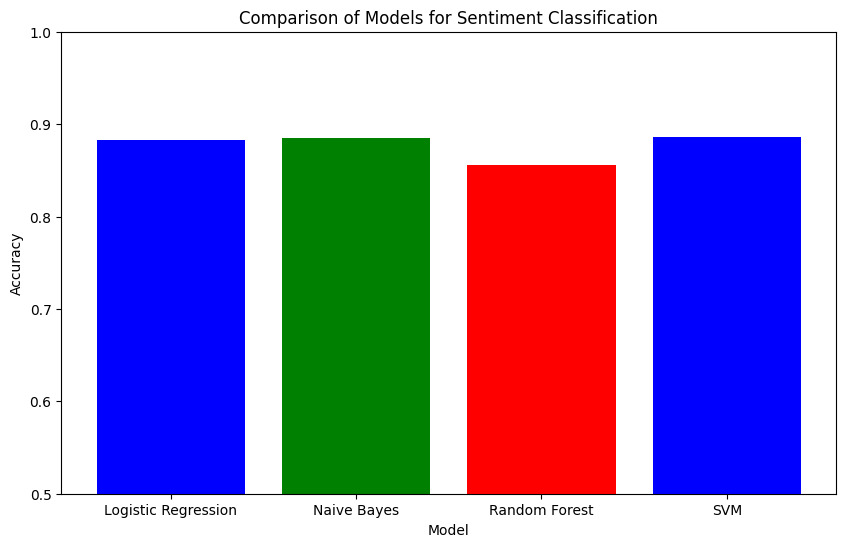

In [207]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'SVM' : SVC()
}

# Train and evaluate each model
accuracies = []
for name, model in models.items():
    print(f"Training and evaluating {name}...")
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy: {accuracy:.4f}")
    print("-" * 50)

# Plotting the comparison graph
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Models for Sentiment Classification')
plt.ylim(0.5, 1.0)
plt.show()


### **Prediction of sentiments of given reviews**

In [206]:
new_texts = [
    "This dress is amazing, I love it!",
    "The quality of this shirt is really poor.",
    "I'm so happy with my purchase, highly recommended!",
    "These pants are uncomfortable and don't fit well",
    "Stunning outfit! Will definitely turn heads.",
    "Elegant and classy, perfect for a night out.",
    "This dress is a showstopper! Love the attention to detail.",
    "The material feels luxurious, worth every penny.",
    "Disappointed with the fit, doesn't flatter my body shape.",
    "Chic and trendy, a must-have for any fashionista.",
    "I was skeptical, but it exceeded my expectations!",
    "Beautiful color, adds a pop of vibrancy to my wardrobe.",
    "The stitching quality is impressive.",
    "Not the best quality for the price, expected more.",
    "Versatile piece, can be dressed up or down.",
    "The size runs a bit small, consider sizing up.",
    "Absolutely in love with this blouse, a new favorite.",
    "Unique design, stands out from the usual fashion choices.",
    "I had high hopes, but the material feels cheap.",
    "Comfortable and stylish, perfect for everyday wear.",
    "The customer service was exceptional, they addressed my concerns promptly.",
    "Fits like a glove, accentuates all the right curves.",
    "Regret buying it, looks better in the pictures.",
    "Bold and daring, a statement piece for sure.",
    "The delivery was fast, impressed with the service.",
    "Wouldn't recommend, the quality doesn't match the price.",
    "Simple yet elegant, a wardrobe staple.",
]

# Vectorize the new text data using the same CountVectorizer instance
X_new_vec = vectorizer.transform(new_texts)

# Predict sentiment on the new text data
new_predictions = nb_classifier.predict(X_new_vec)

# Display predictions
for text, prediction in zip(new_texts, new_predictions):
    sentiment = "Positive" if prediction == 1 else "Negative"
    print(f"Text: {text} ----> Predicted Sentiment: {sentiment}")

Text: This dress is amazing, I love it! ----> Predicted Sentiment: Positive
Text: The quality of this shirt is really poor. ----> Predicted Sentiment: Negative
Text: I'm so happy with my purchase, highly recommended! ----> Predicted Sentiment: Positive
Text: These pants are uncomfortable and don't fit well ----> Predicted Sentiment: Positive
Text: Stunning outfit! Will definitely turn heads. ----> Predicted Sentiment: Positive
Text: Elegant and classy, perfect for a night out. ----> Predicted Sentiment: Positive
Text: This dress is a showstopper! Love the attention to detail. ----> Predicted Sentiment: Positive
Text: The material feels luxurious, worth every penny. ----> Predicted Sentiment: Positive
Text: Disappointed with the fit, doesn't flatter my body shape. ----> Predicted Sentiment: Negative
Text: Chic and trendy, a must-have for any fashionista. ----> Predicted Sentiment: Positive
Text: I was skeptical, but it exceeded my expectations! ----> Predicted Sentiment: Positive
Text: 